<a href="https://colab.research.google.com/github/Bnguy0926/BrainTumorMRIDectectionAI/blob/main/ECS170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain Tumor MRI Classification CNN 🧠
By Andrew Bender, Abhiram Borra, Arnav Kaushik, Britney Nguyen, & George Zavala

The objective of this project was to build a machine learning model that would classify brain MRI scans. We sought out to learn how to build a convolutional neuro-network that would provide us with a basic understanding of the applications of artificial intelligence in healthcare.

Throughout the process of developing this project, we learned about working with data and how to design and optimize a convultional neuro-network.

# **Table of Contents**


1. Loading Libraries and Data Preprocessing
2. Data Processing
3. CNN Model 1: Creation and Training
4. CNN Model 1: Performance
5. Hyperparameter Tuning
6. Final Model: Creation and Training
7. Final Model: Performance



# **Loading Libraries and Data Preprocessing**

In [2]:
# Connecting to the shared Google Drive where our data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading dependencies
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [4]:
# Changes the default working directory
os.chdir("/content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection")

In [5]:
df = pd.read_csv('/content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection/DATASETS/Brain Tumor.csv')

In [6]:
# Printing the columns we can see that we have unnecessary columns in this data file
df.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [7]:
# We dropped the columns of from the data that we did not use
data_scan = df.drop(['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'], axis = 1)

# From here we are left with only the 'Image' and 'Class' directory
print(data_scan.columns)

Index(['Image', 'Class'], dtype='object')


In [8]:
# If we print out data_scan we can see that we have just the 'Image' and 'Class' columns
# The contents of the 'Image' column are just strings corresponding to the name of the image file, but they are not the actual images
# The numbers in the class file is whether there is a brain tumor present in the image or not
# 0 means there is no brain tumor present; 1 means there is a brain tumor present

print(data_scan)

          Image  Class
0        Image1      0
1        Image2      0
2        Image3      1
3        Image4      1
4        Image5      0
...         ...    ...
3757  Image3758      0
3758  Image3759      0
3759  Image3760      0
3760  Image3761      0
3761  Image3762      0

[3762 rows x 2 columns]


In [9]:
# We load the actual images into images_data
# The type of images_data is tensorflow.python.data.ops.batch_op._BatchDataset
images_data = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection/Brain_Tumor',labels=None)

Found 3780 files belonging to 1 classes.


In [10]:
type(images_data)

tensorflow.python.data.ops.batch_op._BatchDataset

# **Data Processing**

In [11]:
# Additionally, we need to store all our labels from the 'Class' column into a numpy array
image_labels = df['Class'].to_numpy()
image_names = df['Image']

In [12]:
import re

drive_folder_path = '//content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection/Brain_Tumor'

# The following code goes through the contents of the Brain_Tumor folder and appends each image into an array image_arrays
image_arrays = []
unsorted_dir = os.listdir(drive_folder_path)
def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [
        int(text)
        if text.isdigit() else text.lower()
        for text in _nsre.split(s)]

list_dir= sorted(unsorted_dir, key=natural_sort_key)
file_name_index = 0

for label in image_names:
  for i in range(file_name_index, len(list_dir), 1):
    filename = list_dir[i]
    if filename.startswith(label) and filename.endswith(".jpg") and (filename not in image_arrays):  # Adjust the file extension as needed
          image_path = os.path.join(drive_folder_path, filename)
          image = Image.open(image_path)
          temp = image.resize((200,200))

          np_array = np.array(temp)
          grayscale_image = cv2.cvtColor(np_array, cv2.COLOR_RGB2GRAY)

          image_arrays.append(grayscale_image/255)
          file_name_index += 1
          break
    continue

<ipython-input-12-ed20cfcb1aa8>:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if filename.startswith(label) and filename.endswith(".jpg") and (filename not in image_arrays):  # Adjust the file extension as needed


In [13]:
# We needed to convert images_arrays into a numpy array
image_arrays = np.array(image_arrays)

# Validating the type of images_arrays
type(image_arrays)

numpy.ndarray

In [14]:
x_train = image_arrays[:1500]
y_train = image_labels[:1500]
x_val = image_arrays[1500:3000]
y_val = image_labels[1500:3000]
x_test = image_arrays[-762:]
y_test = image_labels[-762:]

In [15]:
# To make sure that all our numpy arrays for training, validating, and testing are the size we print the length
print("The length of x_train is " + str(len(x_train)) + ".")
print("The length of y_train is " + str(len(y_train)) + ".")
print("The length of x_val is " + str(len(x_val)) + ".")
print("The length of y_val is " + str(len(y_val)) + ".")
print("The length of x_test is " + str(len(x_test)) + ".")
print("The length of y_test is " + str(len(y_test)) + ".")

The length of x_train is 1500.
The length of y_train is 1500.
The length of x_val is 1500.
The length of y_val is 1500.
The length of x_test is 762.
The length of y_test is 762.


In [16]:
# Each pixel of our image is associated with a value, we can view this by printing out a random image's numpy array

print(image_arrays[10][100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01176471
 0.00784314 0.00784314 0.32941176 0.50196078 0.60784314 0.64313725
 0.61176471 0.58039216 0.57647059 0.55686275 0.54901961 0.56470588
 0.55686275 0.54901961 0.55294118 0.55294118 0.54901961 0.57254902
 0.6        0.60784314 0.62745098 0.63529412 0.62352941 0.60392157
 0.58823529 0.58431373 0.58431373 0.59215686 0.60392157 0.61176471
 0.61568627 0.62352941 0.64705882 0.59607843 0.55686275 0.65882353
 0.73333333 0.7254902  0.6627451  0.61960784 0.61568627 0.66666667
 0.72156863 0.57647059 0.35294118 0.50196078 0.6588

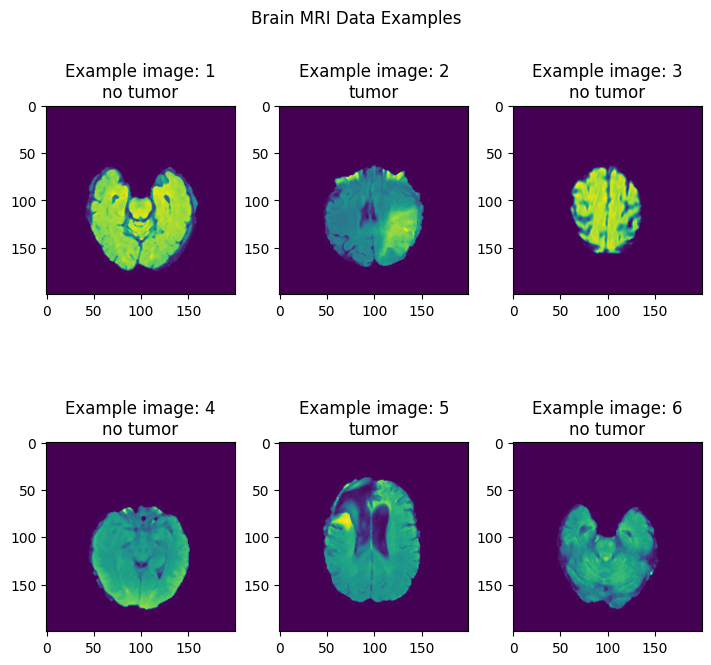

In [17]:
from matplotlib.projections import axes
import random
from math import ceil

# To check that our data has been grayscaled and normalized accordinging, we print out random examples of our images from image_arrays

N=10

classification = {0: "no tumor", 1: "tumor"}

fig, ax = plt.subplots(2, 3, layout='constrained',
                         figsize=(7, 7))

for i in range(1, 7):
  plt.subplot(2, 3, i, )
  idx = random.randint(0, 3762)
  plt.imshow(image_arrays[idx])
  plt.title("Example image: " + str(i) + "\n" + classification[image_labels[idx]])
plt.suptitle("Brain MRI Data Examples")
plt.show()

#**CNN Model 1**: Creation and Training

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# We create an instance of the Sequential class from Keras
model = Sequential()

# Adding the layers into our model
# 2D convolutional layer, 16 filter, 3 x 3 window size, ReLU activation (input layer)
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(200, 200, 1)))

# 2 x 2 Max Pooling Layer
model.add(MaxPooling2D(2, 2))

# 2D convolutional layer, 32 filter, 3 x 3 window size, ReLU activation
model.add(Conv2D(32, (3,3), 1, activation = 'relu'))

# 2 x 2 Max Pooling Layer
model.add(MaxPooling2D(2, 2))

# 2D convolutional layer, 16 filter, 3 x 3 window size, ReLU activation
model.add(Conv2D(16, (3,3), 1, activation = 'relu'))

# 2 x 2 Max Pooling Layer
model.add(MaxPooling2D(2, 2))

# Flatten Layer before introducing the fully connected layers
model.add(Flatten())

# 1st Fully-Connected Layer, 256 nodes, ReLU activation
model.add(Dense(256, activation = 'relu'))

# 2nd Fully-Connected Layer, 1 node, sigmoid activation (Output Layer)
model.add(Dense(1, activation = 'sigmoid'))

In the following model, we used Keras in order to create our layers.

In [19]:
# Compiling our model with the Adam optimizer and binary cross entropy loss
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
# Print model summary with the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 16)        0

In [21]:
# Fitting our model on the training

history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_val, y_val),
)

Epoch 1/10
47/47 [==============================] - 15s 51ms/step - loss: 0.4588 - accuracy: 0.7767 - val_loss: 0.5217 - val_accuracy: 0.7613
Epoch 2/10
47/47 [==============================] - 1s 23ms/step - loss: 0.3601 - accuracy: 0.8353 - val_loss: 0.4150 - val_accuracy: 0.8313
Epoch 3/10
47/47 [==============================] - 1s 23ms/step - loss: 0.3039 - accuracy: 0.8627 - val_loss: 0.3965 - val_accuracy: 0.8427
Epoch 4/10
47/47 [==============================] - 1s 26ms/step - loss: 0.2587 - accuracy: 0.8987 - val_loss: 0.2999 - val_accuracy: 0.8753
Epoch 5/10
47/47 [==============================] - 1s 26ms/step - loss: 0.1996 - accuracy: 0.9293 - val_loss: 0.2750 - val_accuracy: 0.8860
Epoch 6/10
47/47 [==============================] - 2s 33ms/step - loss: 0.1810 - accuracy: 0.9300 - val_loss: 0.2603 - val_accuracy: 0.8987
Epoch 7/10
47/47 [==============================] - 1s 23ms/step - loss: 0.1306 - accuracy: 0.9493 - val_loss: 0.4330 - val_accuracy: 0.8547
Epoch 8/10
4

In [22]:
import sklearn.metrics

y_pred = model.predict(x_test)

24/24 [==============================] - 0s 15ms/step


# **CNN Model 1:** Performance

In [23]:
# Evaluating the accuracy on the test set
print("Accuracy: " + str((sklearn.metrics.accuracy_score(y_test, y_pred.argmax(axis=1)))))

Accuracy: 0.33858267716535434


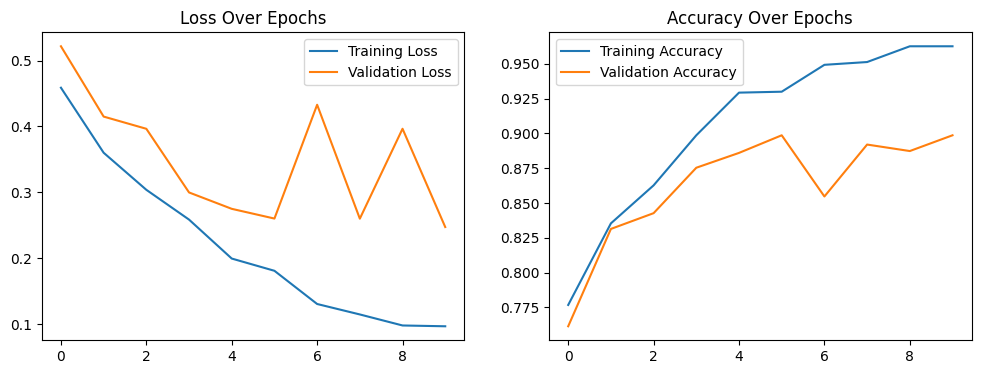

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

In [43]:
from sklearn.metrics import classification_report

# Assuming binary classification, adjust the threshold if needed
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate the classification report
target_names = ['Class 0', 'Class 1']
# Replace with your class labels
report = classification_report(y_test, y_pred_classes, target_names=target_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Class 0       0.80      0.89      0.85       258
     Class 1       0.94      0.89      0.91       504

    accuracy                           0.89       762
   macro avg       0.87      0.89      0.88       762
weighted avg       0.89      0.89      0.89       762



##Accurate Classification Examples ✅

In [25]:
# Assuming binary classification, adjust the threshold if needed
y_pred_classes_m1 = (y_pred > 0.5).astype(int)

In [26]:
import numpy as np

acc_m1_classified = []

classes = [False] * 2

for i in range(len(y_test)):
  if y_test[i] == int(y_pred_classes_m1[i]):
    if classes[int(y_pred_classes_m1[i])] == False:
      classes[int(y_pred_classes_m1[i])] = True
      acc_m1_classified.append(i)
  if classes == [True] * 2:
    break

In [27]:
class_names = {0: "no tumor", 1: "a tumor"}

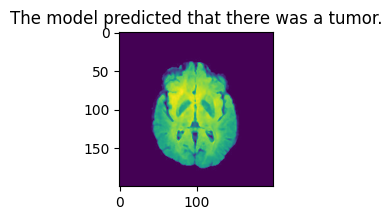

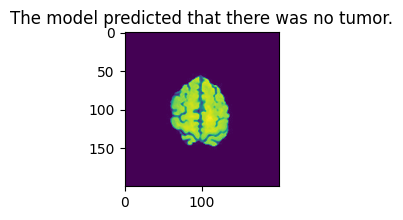

In [28]:
for i in range(len(acc_m1_classified)):
  plt.rcParams['figure.figsize'] = [2, 2]
  plt.imshow(x_test[acc_m1_classified[i]])
  plt.title(f"The model predicted that there was {class_names[y_test[acc_m1_classified[i]]]}.")
  plt.show()

## Misclassification Examples ❌

In [29]:
import numpy as np

misclassified = []

classes = [False] * 2

for i in range(len(y_test)):
  if y_test[i] != int(y_pred_classes_m1[i]):
    if classes[int(y_pred_classes_m1[i])] == False:
      classes[int(y_pred_classes_m1[i])] = True
      misclassified.append(i)
  if classes == [True] * 2:
    break

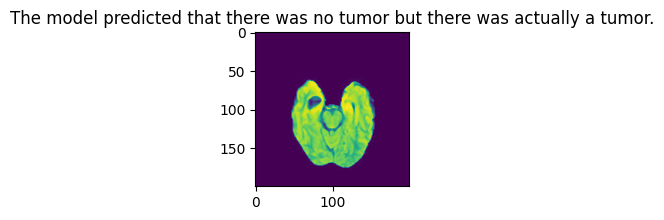

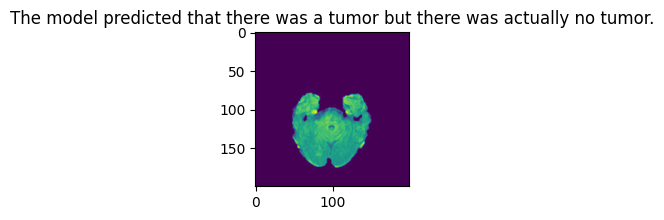

In [30]:
for i in range(len(misclassified)):
  plt.rcParams['figure.figsize'] = [2, 2]
  plt.imshow(x_test[misclassified[i]])
  plt.title(f"The model predicted that there was {class_names[int(y_pred_classes_m1[misclassified[i]])]} but there was actually {class_names[int(y_test[misclassified[i]])]}.")
  plt.show()

##Comments on Final Model Performance 📄
After fitting our model to the training data, we observed loss was decreasing slowly and accuracy increasing slowly. Additionally when we run our accuracy on our test set, we get an accuracy of approximately 34.27%. From this we realized that our model can be optimized and it can be improved to increase accuracy by the end of the training. Additionally when extracting the misclassified predictions we noticed that the majority of the misclassifications were false positive.

The following sections are the improvements we made to our model.

# **Hyperparameter Tuning**

In [31]:
import tensorflow as tf
!pip install keras-tuner --upgrade
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model builder function
def model_builder(hp):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 1)))
    model.add(MaxPooling2D())
    model.add(Flatten())

    # Hyperparameter: Number of hidden layers
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=10, default=1)

    # Hyperparameter: Number of nodes per hidden layer
    num_nodes = hp.Int('num_nodes', min_value=16, max_value=128, step=16, default=64)

    for _ in range(num_hidden_layers):
        model.add(Dense(num_nodes, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    # Hyperparameter: Learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Define the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='dir',  # Change 'dir' to your desired directory
    project_name='x'
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=30, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Hidden Layers: {best_hps.get('num_hidden_layers')}")
print(f"Number of Nodes per Hidden Layer: {best_hps.get('num_nodes')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, epochs=30, validation_split=0.2)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.8 MB/s eta 0:00:00
Best Hyperparameters:
Number of Hidden Layers: 3
Number of Nodes per Hidden Layer: 96
Learning Rate: 0.01
Epoch 1/30
38/38 [==============================] - 3s 30ms/step - loss: 1.1735 - accuracy: 0.8183 - val_loss: 0.4416 - val_accuracy: 0.8000
Epoch 2/30
38/38 [==============================] - 1s 16ms/step - loss: 0.2530 - accuracy: 0.9008 - val_loss: 0.4739 - val_accuracy: 0.8033
Epoch 3/30
38/38 [==============================] - 1s 16ms/step - loss: 0.1169 - accuracy: 0.9600 - val_loss: 0.4206 - val_accuracy: 0.8800
Epoch 4/30
38/38 [==============================] - 1s 16ms/step - loss: 0.0584 - accuracy: 0.9850 - val_loss: 0.5376 - val_accuracy: 0.8700
Epoch 5/30
38/38 [==============================] - 1s 16ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.4820 - val_accuracy: 0.8667
Epoch 6/30
38/38 [==============================] - 1s 15ms/step - loss: 0.0298 - accuracy: 0.9892 - val_los

# **Final Model**: Creation and Training

In [32]:
model_final = Sequential()

# Adding the layers into our model
# 2D convolutional layer, 16 filter, 3 x 3 window size, ReLU activation (input layer)
model_final.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(200, 200, 1)))


# 2 x 2 Max Pooling Layer
model_final.add(MaxPooling2D(2, 2))

# 2D convolutional layer, 32 filter, 3 x 3 window size, ReLU activation
model_final.add(Conv2D(32, (3,3), 1, activation = 'relu'))

# 2 x 2 Max Pooling Layer
model_final.add(MaxPooling2D(2, 2))

# 2D convolutional layer, 32 filter, 3 x 3 window size, ReLU activation
model_final.add(Conv2D(32, (3,3), 1, activation = 'relu'))

model_final.add(Flatten())
# 2D convolutional layer, 16 filter, 3 x 3 window size, ReLU activation
model_final.add(Dense(1, activation='sigmoid'))

In [33]:
model_final.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

# Print model summary with the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 16)        0

In [34]:
model_final_history = model_final.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
38/38 [==============================] - 7s 84ms/step - loss: 0.4564 - accuracy: 0.7675 - val_loss: 0.4770 - val_accuracy: 0.7833
Epoch 2/30
38/38 [==============================] - 1s 28ms/step - loss: 0.3750 - accuracy: 0.8317 - val_loss: 0.4214 - val_accuracy: 0.8233
Epoch 3/30
38/38 [==============================] - 1s 29ms/step - loss: 0.3023 - accuracy: 0.8650 - val_loss: 0.3670 - val_accuracy: 0.8767
Epoch 4/30
38/38 [==============================] - 1s 30ms/step - loss: 0.2771 - accuracy: 0.8800 - val_loss: 0.3560 - val_accuracy: 0.8433
Epoch 5/30
38/38 [==============================] - 1s 29ms/step - loss: 0.2083 - accuracy: 0.9250 - val_loss: 0.3086 - val_accuracy: 0.8800
Epoch 6/30
38/38 [==============================] - 1s 33ms/step - loss: 0.2071 - accuracy: 0.9067 - val_loss: 0.2843 - val_accuracy: 0.8867
Epoch 7/30
38/38 [==============================] - 1s 34ms/step - loss: 0.1426 - accuracy: 0.9475 - val_loss: 0.2524 - val_accuracy: 0.8967
Epoch 8/30
38

In [35]:
y_hat = model_final.predict(x_test)

24/24 [==============================] - 1s 16ms/step


# **Final Model**: Performance

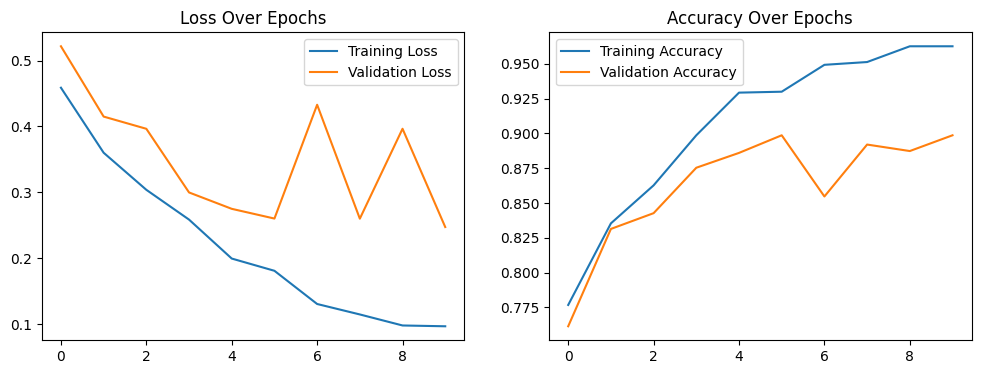

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

In [39]:
from sklearn.metrics import classification_report

# Assuming binary classification, adjust the threshold if needed
y_pred_classes = (y_hat > 0.5).astype(int)

# Generate the classification report
target_names = ['Class 0', 'Class 1']
# Replace with your class labels
report = classification_report(y_test, y_pred_classes, target_names=target_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Class 0       0.72      0.94      0.82       258
     Class 1       0.96      0.81      0.88       504

    accuracy                           0.86       762
   macro avg       0.84      0.88      0.85       762
weighted avg       0.88      0.86      0.86       762



In [40]:
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred_classes))

Accuracy: 0.8556430446194225


##Accurate Classification Examples ✅

In [41]:
import numpy as np

acc_classified = []

classes = [False] * 2

for i in range(len(y_test)):
  if y_test[i] == int(y_pred_classes[i]):
    if classes[int(y_pred_classes[i])] == False:
      classes[int(y_pred_classes[i])] = True
      acc_classified.append(i)
  if classes == [True] * 2:
    break

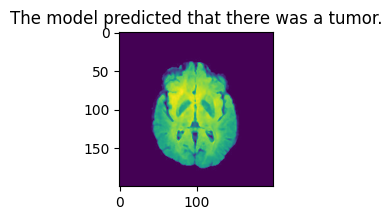

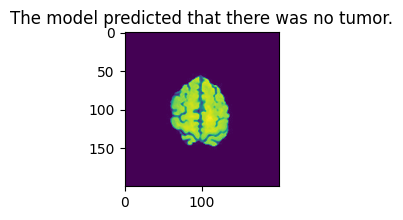

In [42]:
for i in range(len(acc_classified)):
  plt.rcParams['figure.figsize'] = [2, 2]
  plt.imshow(x_test[acc_classified[i]])
  plt.title(f"The model predicted that there was {class_names[y_test[acc_classified[i]]]}.")
  plt.show()

##Misclassification Examples ❌

In [ ]:
import numpy as np

misclassified = []

classes = [False] * 2

for i in range(len(y_test)):
  if y_test[i] != int(y_pred_classes[i]):
    if classes[int(y_pred_classes[i])] == False:
      classes[int(y_pred_classes[i])] = True
      acc_classified.append(i)
  if classes == [True] * 2:
    break

misclass_all = []

for i in range(len(y_test)):
  if y_test[i] != int(y_pred_classes[i]):
    if classes[int(y_pred_classes[i])] == False:
      classes[int(y_pred_classes[i])] = True
      misclass_all.append(i)

In [ ]:
class_names = {0: "no tumor", 1: "a tumor"}

In [ ]:
for i in range(2):
  plt.rcParams['figure.figsize'] = [2, 2]
  plt.imshow(x_test[misclassified[i]])
  plt.title(f"The model predicted that there was {class_names[int(y_pred_classes[misclassified[i]])]} but there was actually {class_names[int(y_test[misclassified[i]])]}.")
  plt.show()

##Comments on Final Model Performance 📄

After desiging a hyperparameter tuning algorithm, we were able to increase the accuracy of our model to approximately 86%. However there are still room for improvement and the majority of the misclassifications are false positives, which is something that would require further investigation in the future.